# Avacado Project

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation                        
AveragePrice - the average price of a single avocado                                                                     
type - conventional or organic                                                                                        
year - the year                                                                             
Region - the city or region of the observation                                                     
Total Volume - Total number of avocados sold                                                               
4046 - Total number of avocados with PLU 4046 sold                                           
4225 - Total number of avocados with PLU 4225 sold                                                                             
4770 - Total number of avocados with PLU 4770 sold                                                                             


Inspiration /Label:

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("avocado[1].csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
#Checking null values in our dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we observed from the above code there is no null value in our DataFrame.

In [5]:
#checking shape of of the DataFrame
df.shape

(18249, 14)

we see that our dataframe has 14 columns and 18249 rows.So, we need to predict the Average price by 13 types of data and each column contains 18249 data.

In [6]:
#Checking column name
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#Checking information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


From the code above we are examining the presence non-null values, data type and memory type.

In [8]:
#checking mean,standard_deviation,minimum value,25th percentile,50th percentile,75th percentile,maximum value by df.describe
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


we see that mean of 4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags are very less.                       
It means there are lot of near to 0 value exist in each columns.

# Exploratory Data Analysis (EDA)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:>

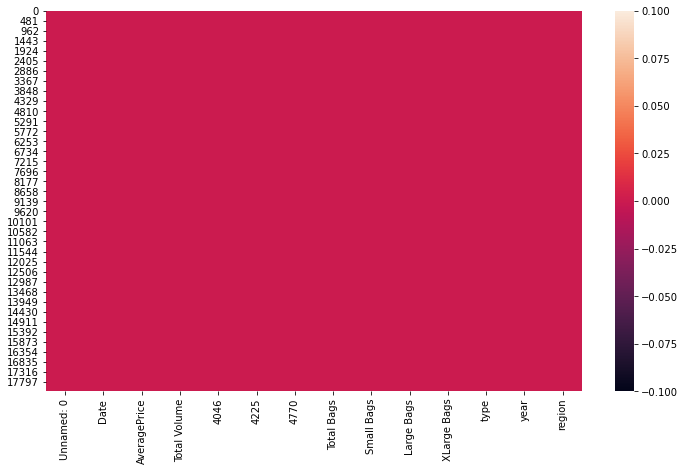

In [10]:
#Checking null values using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

From the heatmap we can see that there is no null value in the dataset

Since 'Unnamed' column is the index volumn of the dataframe,we drop it.

In [11]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
#Spliting Date,Month and Year of the "Date" column of the Dataframe
year=[]
month=[]
day=[]
m=range(0,18249)
for i in m:
    a=df['Date'][i][0]+df['Date'][i][1]+df['Date'][i][2]+df['Date'][i][3]
    b=df['Date'][i][5]+df['Date'][i][6]
    c=df['Date'][i][8]+df['Date'][i][9]
    year.append(a)
    month.append(b)
    day.append(c)

In [13]:
print(len(year),len(month),len(day))

18249 18249 18249


In [14]:
#df['Year']=year
df['Month']=month
df['Day']=day

In [15]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02,04
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01,14


In [16]:
#now we can drop the'Date' column of the dataframe.
df=df.drop("Date",axis=1)

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [18]:
#Checking correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

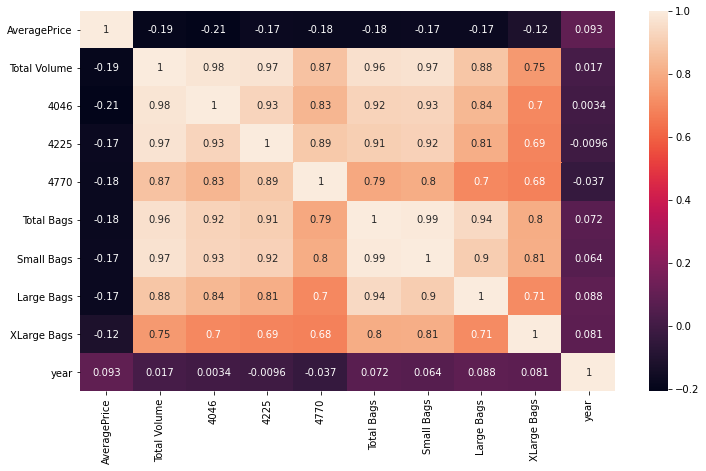

In [19]:
#checking correlation using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

We can see that there is no good relationship between the target column "average value" with every column.

In [20]:
#Checking Skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

we see that maximum column of the DataFrame present heavy skewness

now we check distribution curve of every column by distplot:

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

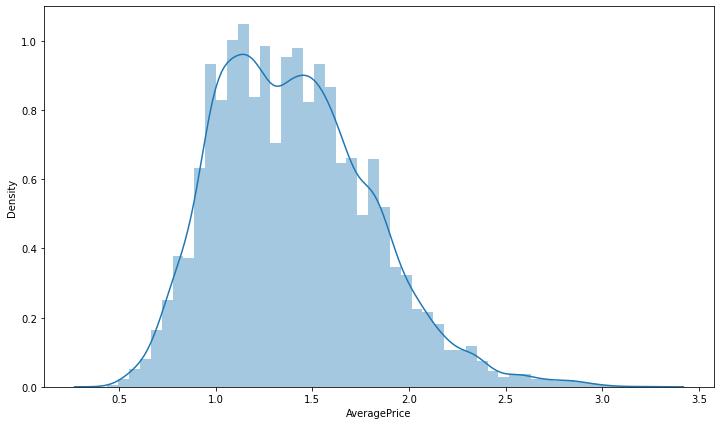

In [21]:
#checking distribution curve of "AveragePrice" column
plt.figure(figsize=(12,7))
sns.distplot(df["AveragePrice"])

above pictures implyes some skewness present on the left side of the curve 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

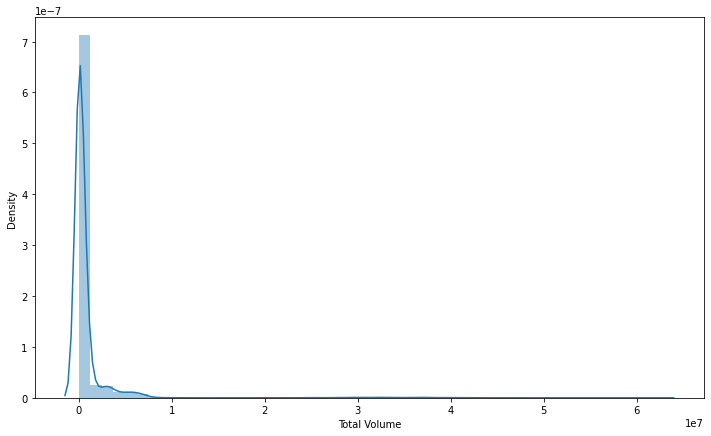

In [22]:
#checking distribution curve of "Total Volume" column
plt.figure(figsize=(12,7))
sns.distplot(df["Total Volume"])

we can see fron the above plot that there is heavy skewness present in the left side.

In [23]:
#Remove skewness
df["Total Volume"]=np.log(df["Total Volume"])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

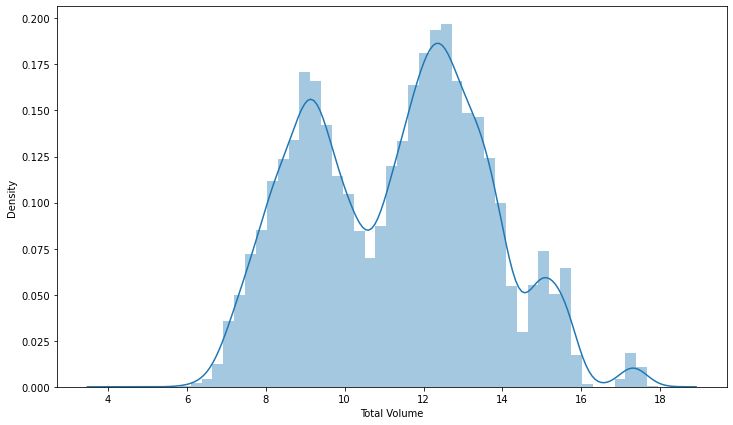

In [24]:
#checking distribution curve of "Total Volume" column after remove skewness
plt.figure(figsize=(12,7))
sns.distplot(df["Total Volume"])

<AxesSubplot:xlabel='4046', ylabel='Density'>

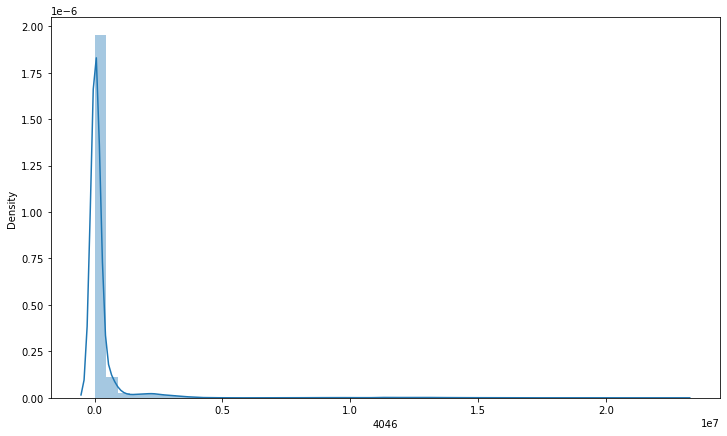

In [25]:
#checking distribution curve of "4046" column
plt.figure(figsize=(12,7))
sns.distplot(df["4046"])

<AxesSubplot:xlabel='4225', ylabel='Density'>

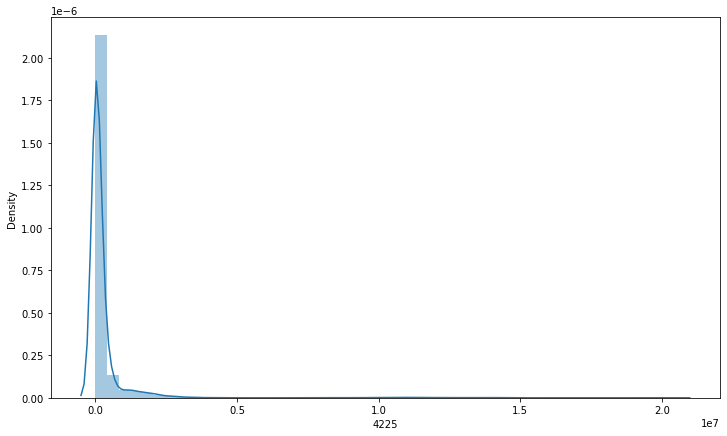

In [26]:
#checking distribution curve of "4225" column
plt.figure(figsize=(12,7))
sns.distplot(df["4225"])

<AxesSubplot:xlabel='4770', ylabel='Density'>

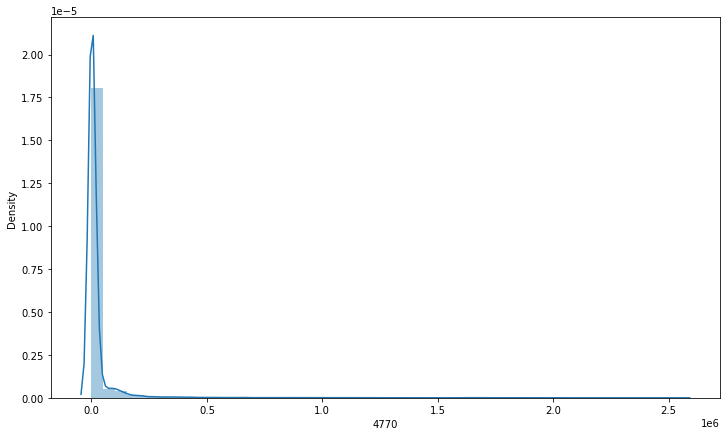

In [27]:
#checking distribution curve of "4770" column
plt.figure(figsize=(12,7))
sns.distplot(df["4770"])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

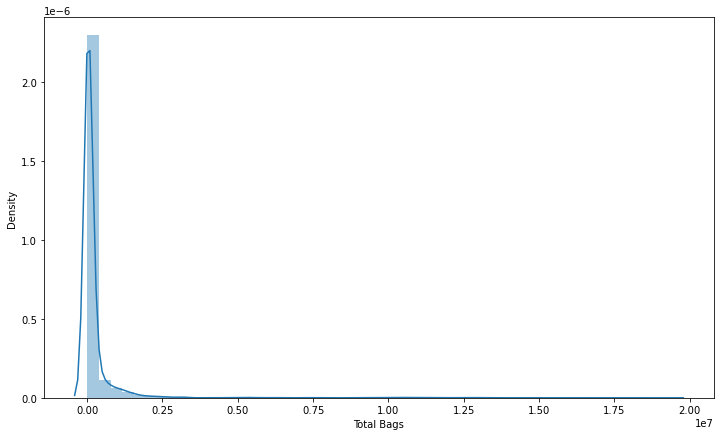

In [28]:
#checking distribution curve of "Total Bags" column
plt.figure(figsize=(12,7))
sns.distplot(df["Total Bags"])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

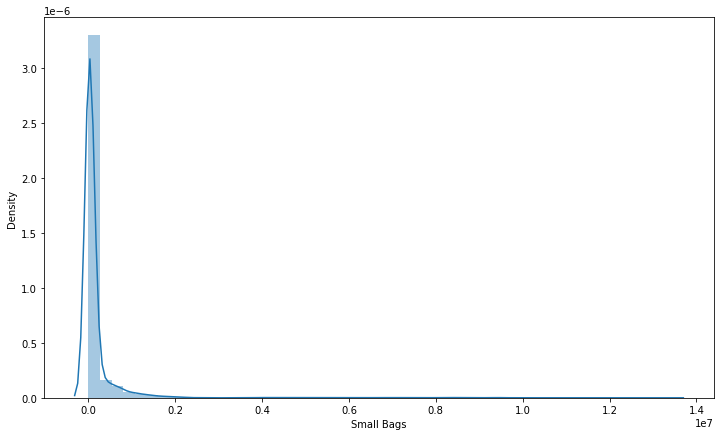

In [29]:
#checking distribution curve of "Small Bags" column
plt.figure(figsize=(12,7))
sns.distplot(df["Small Bags"])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

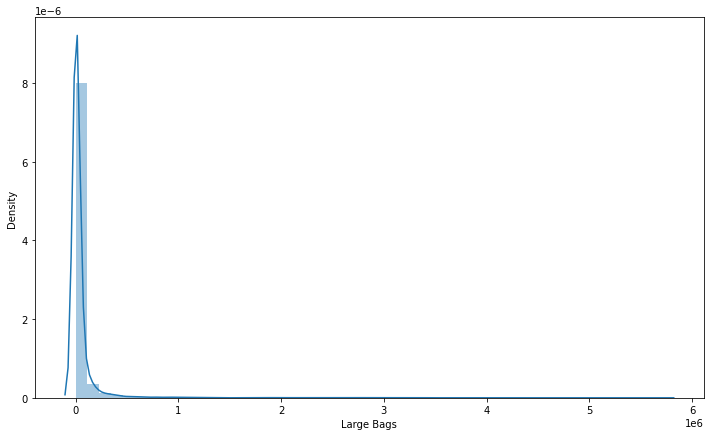

In [30]:
#checking distribution curve of "Large Bags" column
plt.figure(figsize=(12,7))
sns.distplot(df["Large Bags"])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

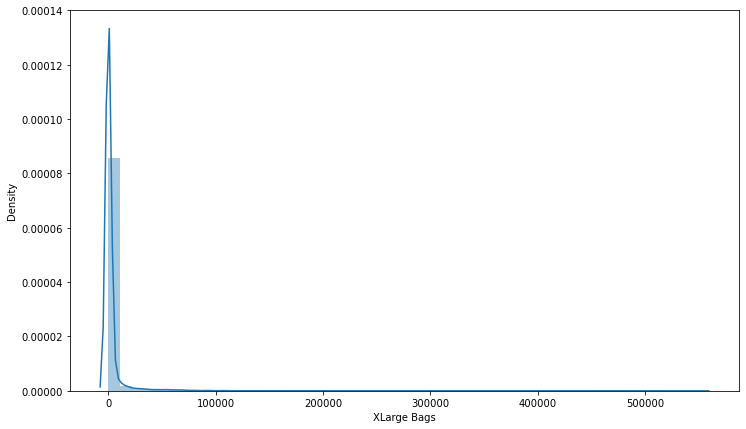

In [31]:
#checking distribution curve of "XLarge Bags" column
plt.figure(figsize=(12,7))
sns.distplot(df["XLarge Bags"])

we see that the distribution curve of above 5 graphs are same.Ther is heavy skewness present in this columns

In [32]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,06
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02,04
18245,1.71,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01,28
18246,1.87,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01,21
18247,1.93,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01,14


conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

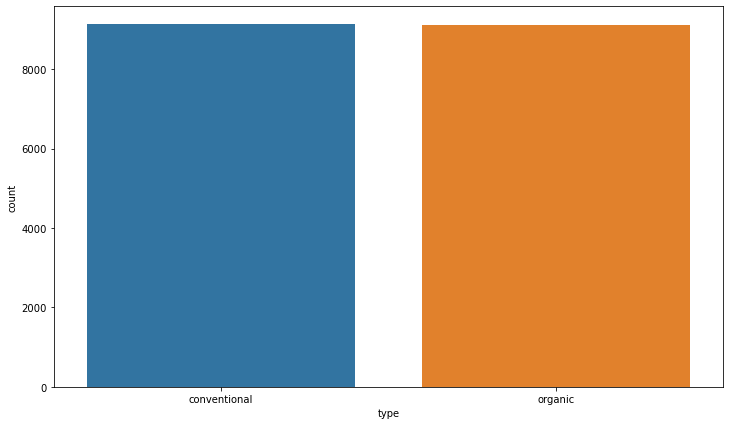

In [33]:
print(df["type"].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df["type"])

we see that there is two type of data one is conventional and another is organic.class of type column is balanced

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

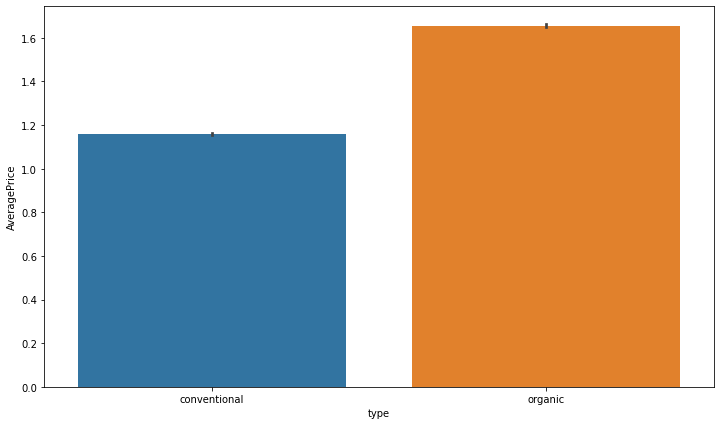

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(x='type',y='AveragePrice',data=df)

we see that average price of organic avacado is higher than conventional avacado

In [35]:
#to change the non-numeric data to numeric data of 'type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type']).astype(float)

In [36]:
print(df["type"].value_counts())

0.0    9126
1.0    9123
Name: type, dtype: int64


0.0--->conventional                                                    
1.0--->organic

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

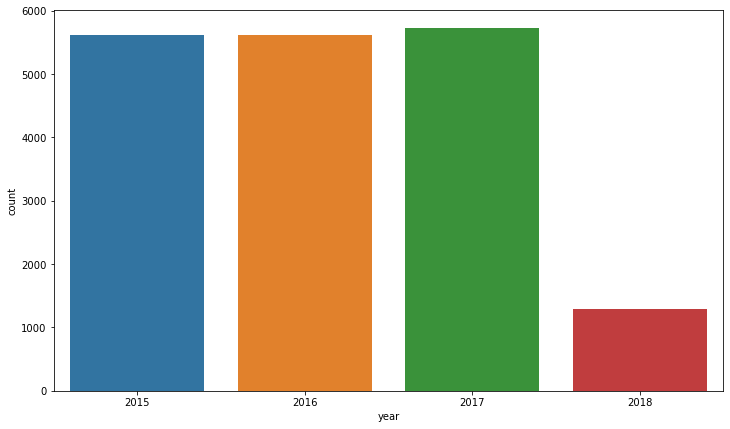

In [37]:
print(df["year"].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df["year"])

we see that 4 years data present in our DataFrame and we have very less data of 2018 year.so,class is imbalanced

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

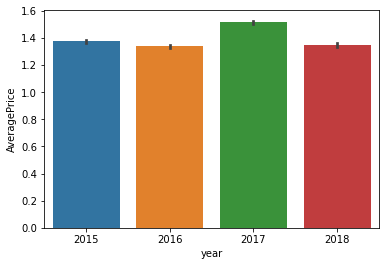

In [38]:
sns.barplot(x='year',y='AveragePrice',data=df)

from the above plot we see that average price was more in 2017

In [39]:
#to change the non-numeric data to numeric data of 'year' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['year']=le.fit_transform(df['year']).astype(float)

In [40]:
print(df["year"].value_counts())

2.0    5722
1.0    5616
0.0    5615
3.0    1296
Name: year, dtype: int64


0.0--->2015                                   
1.0--->2016                                       
2.0--->2017                                     
3.0--->2018                               

BuffaloRochester       338
Boise                  338
Nashville              338
SanDiego               338
GreatLakes             338
Houston                338
PhoenixTucson          338
Sacramento             338
MiamiFtLauderdale      338
Northeast              338
Portland               338
RichmondNorfolk        338
GrandRapids            338
Philadelphia           338
Chicago                338
NewYork                338
California             338
Detroit                338
Columbus               338
Boston                 338
Albany                 338
Roanoke                338
Midsouth               338
NewOrleansMobile       338
HartfordSpringfield    338
Tampa                  338
HarrisburgScranton     338
Seattle                338
Pittsburgh             338
Atlanta                338
SouthCentral           338
DallasFtWorth          338
BaltimoreWashington    338
Orlando                338
CincinnatiDayton       338
Jacksonville           338
SouthCarolina          338
D

<AxesSubplot:xlabel='region', ylabel='count'>

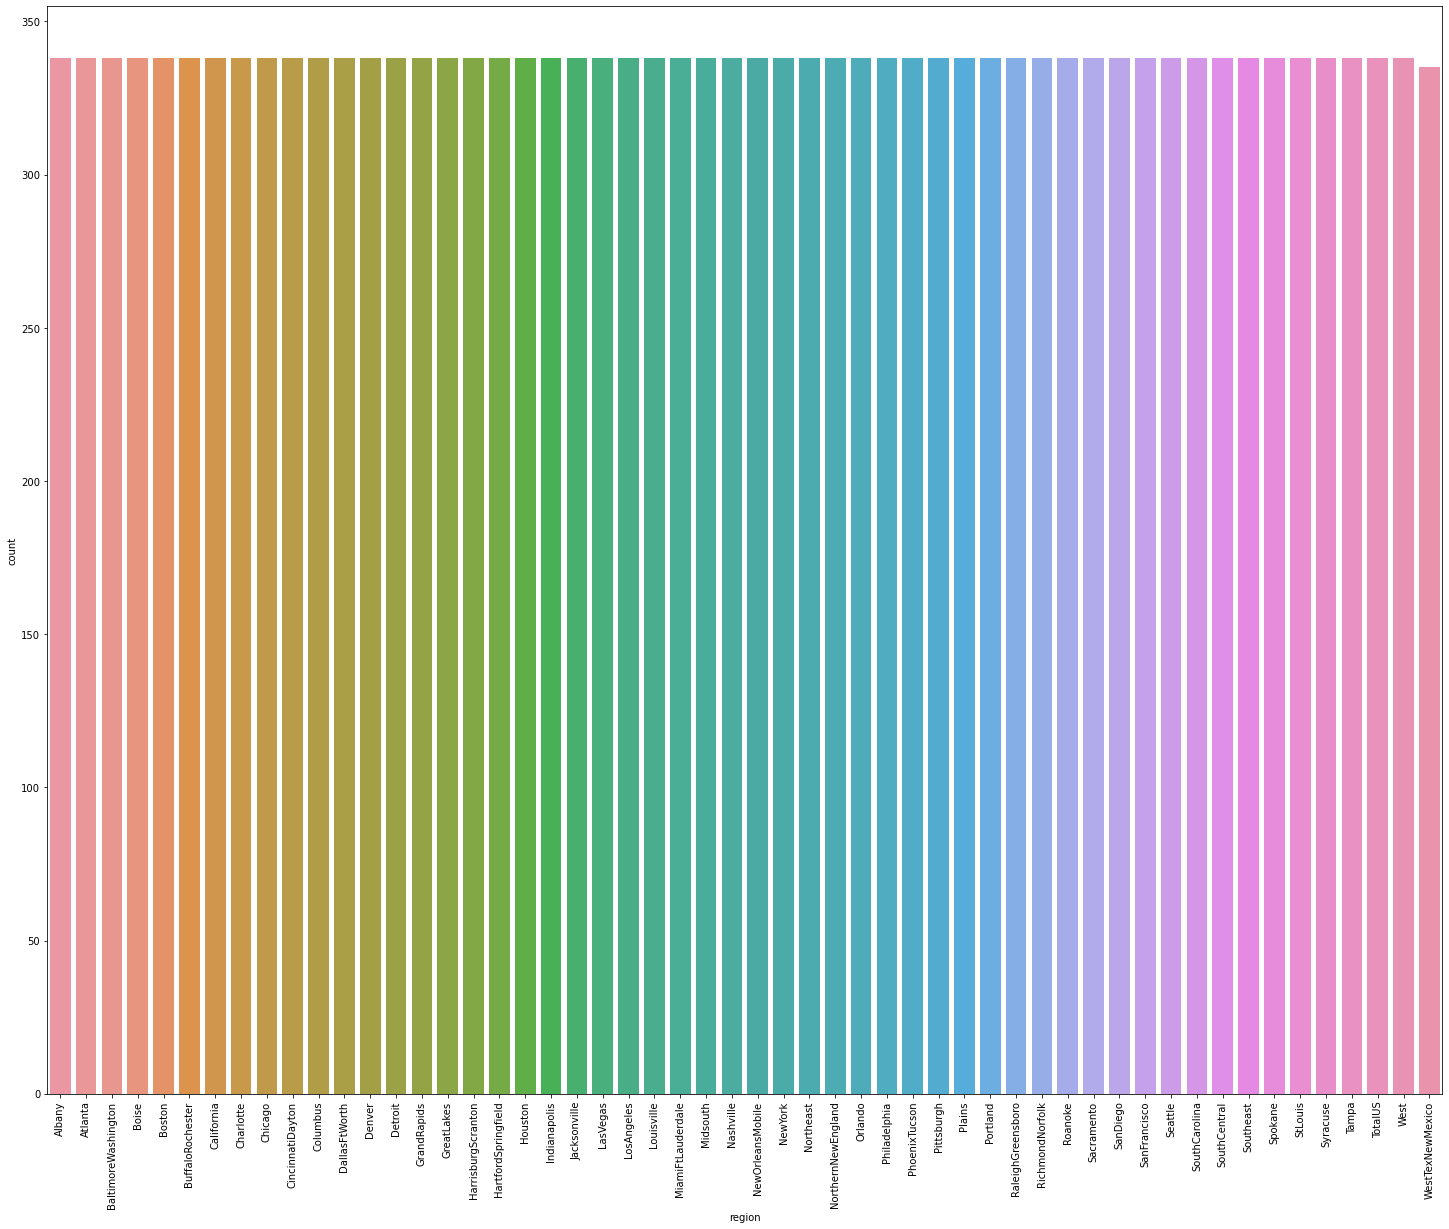

In [41]:
print(df["region"].value_counts())
plt.figure(figsize=(25,20))
plt.xticks(rotation=90)
sns.countplot(df["region"])

we see that class of "Region" is balanced

In [42]:
#to change the non-numeric data to numeric data of 'region' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region']).astype(float)

In [43]:
print(df["region"].value_counts())

0.0     338
39.0    338
37.0    338
48.0    338
46.0    338
3.0     338
15.0    338
41.0    338
6.0     338
18.0    338
5.0     338
17.0    338
40.0    338
26.0    338
9.0     338
47.0    338
49.0    338
11.0    338
10.0    338
36.0    338
1.0     338
32.0    338
31.0    338
12.0    338
13.0    338
34.0    338
27.0    338
2.0     338
8.0     338
38.0    338
20.0    338
19.0    338
52.0    338
28.0    338
29.0    338
25.0    338
4.0     338
45.0    338
21.0    338
35.0    338
23.0    338
50.0    338
7.0     338
14.0    338
30.0    338
51.0    338
24.0    338
43.0    338
42.0    338
22.0    338
33.0    338
44.0    338
16.0    338
53.0    335
Name: region, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

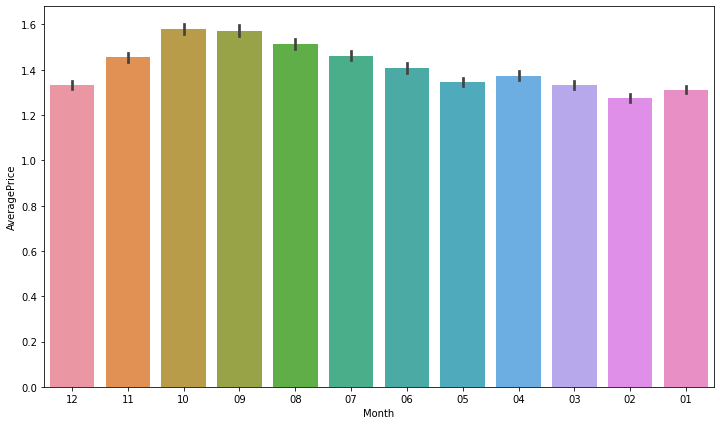

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='Month',y='AveragePrice',data=df)

We see higher average prices in September and October month

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

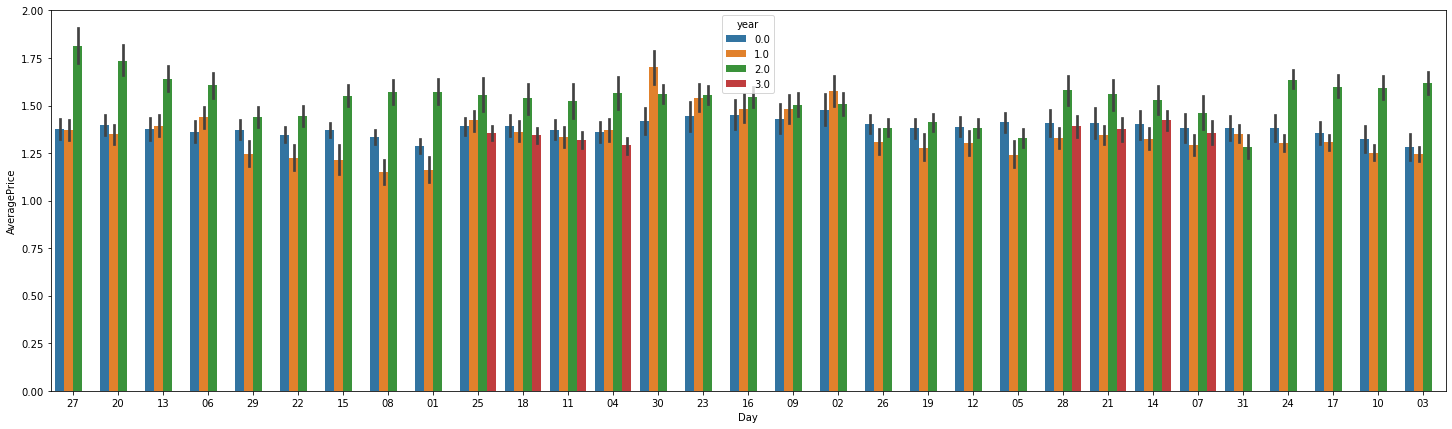

In [45]:
plt.figure(figsize=(25,7))
sns.barplot(x='Day',y='AveragePrice',hue='year',data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

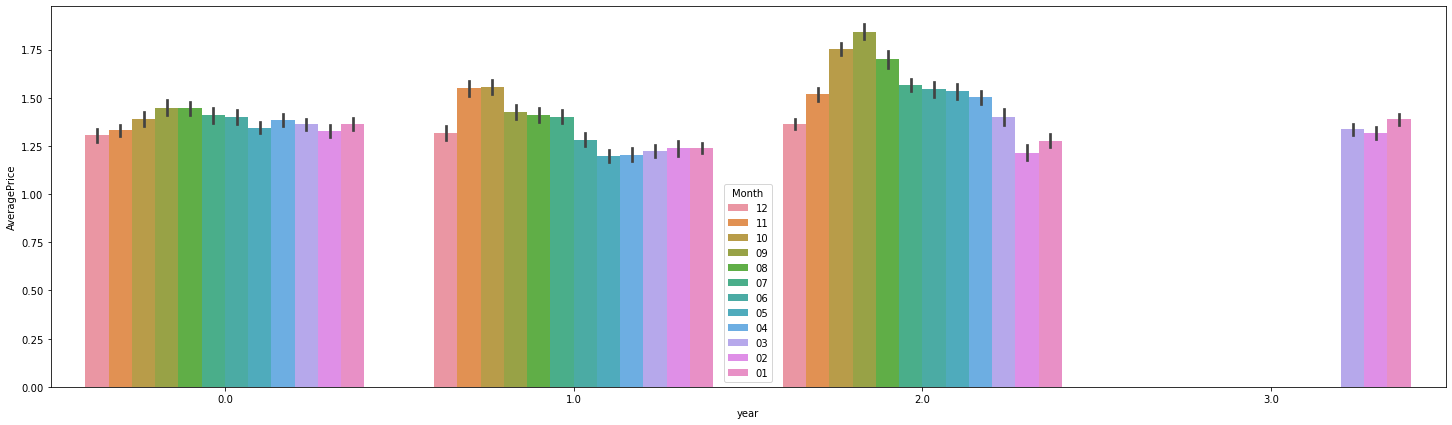

In [46]:
plt.figure(figsize=(25,7))
sns.barplot(x='year',y='AveragePrice',hue='Month',data=df)

we see that maximum seling month of Avacado in every year.

here 0.0--->2015                              
     0.1--->2016                                       
     0.2--->2017                                                                             
     0.3--->2018                     

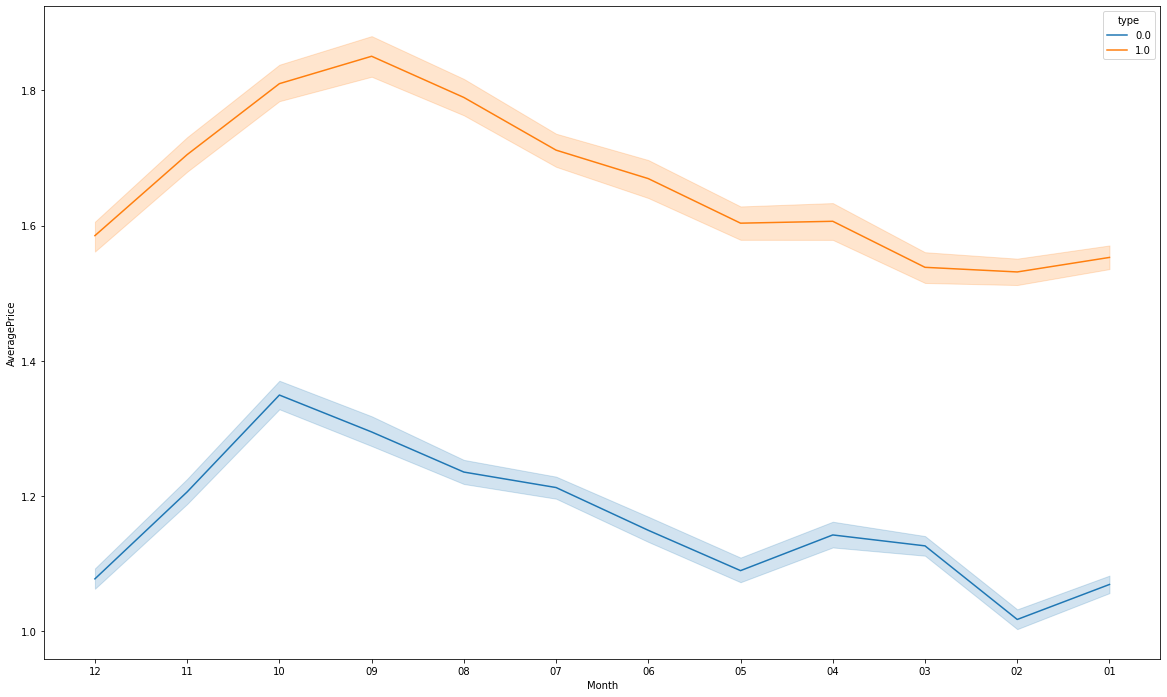

In [47]:
plt.figure(figsize=(20,12))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

we see from the above plot that average price is high both type of avacado in sept,oct and nov month of a year.

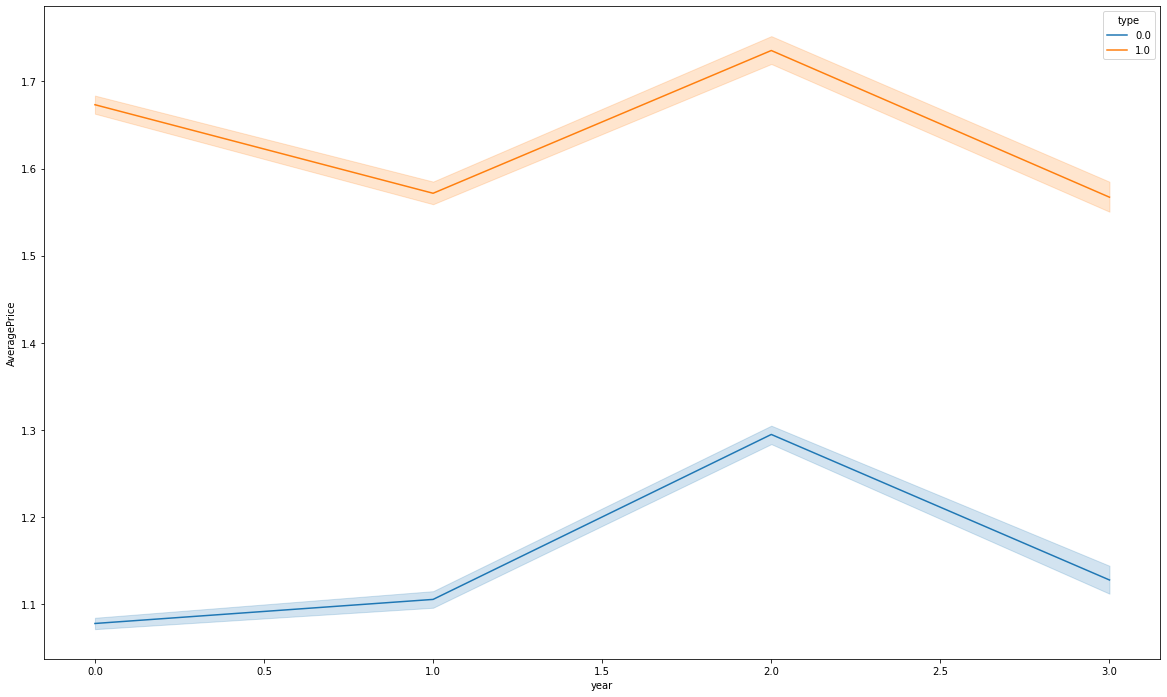

In [48]:
plt.figure(figsize=(20,12))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

The price of avocado in 2017 is higher than the other year in our data

In [49]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0,12,27
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0,12,20
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0,12,13
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0,12,06
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0,11,29


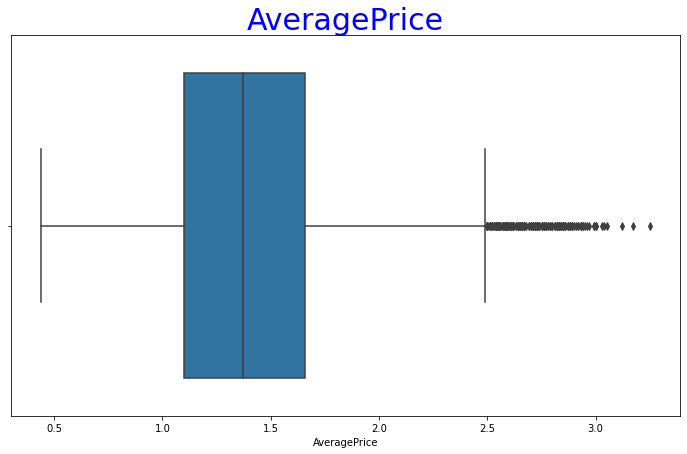

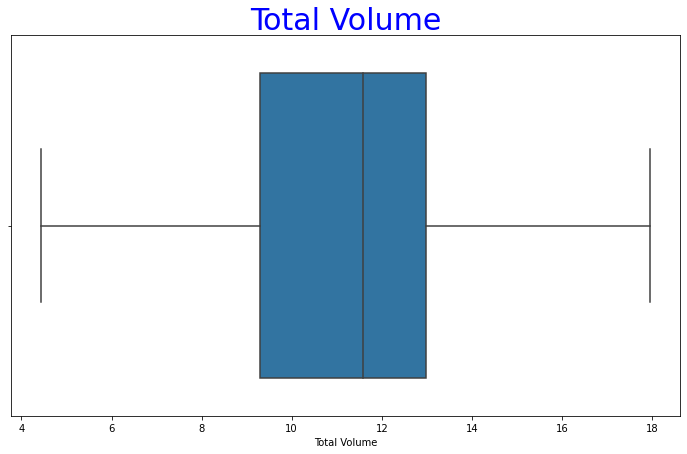

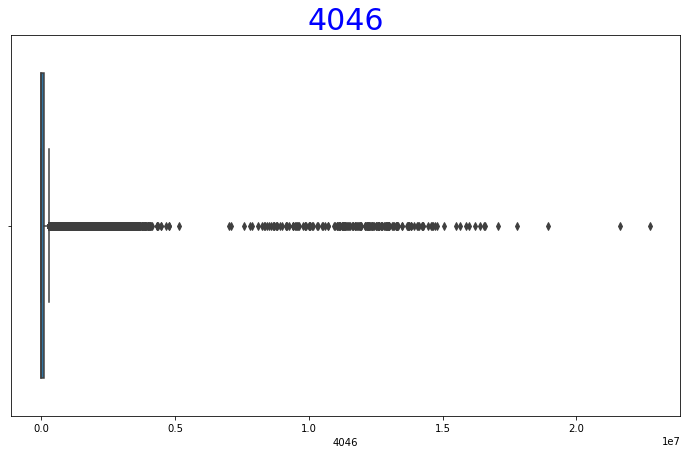

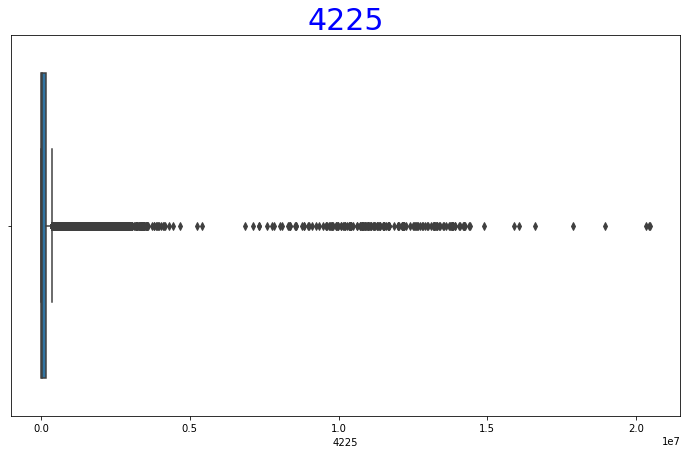

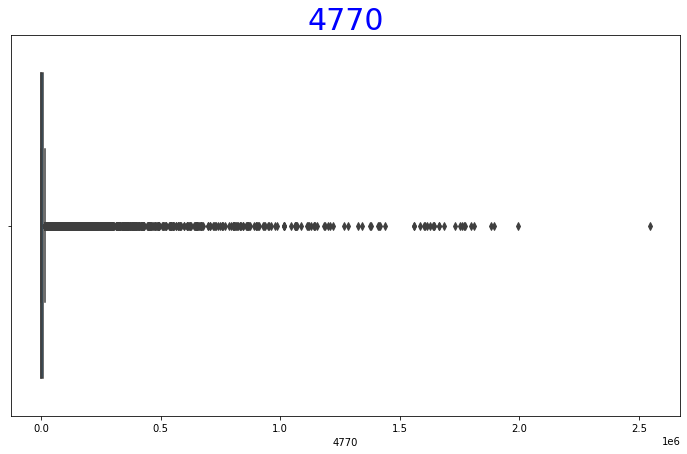

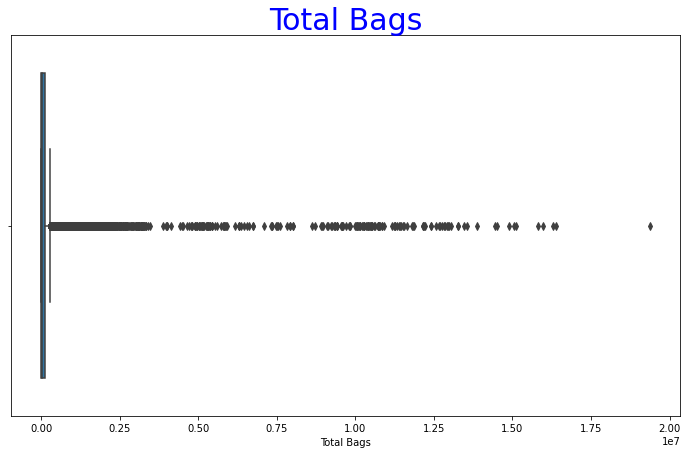

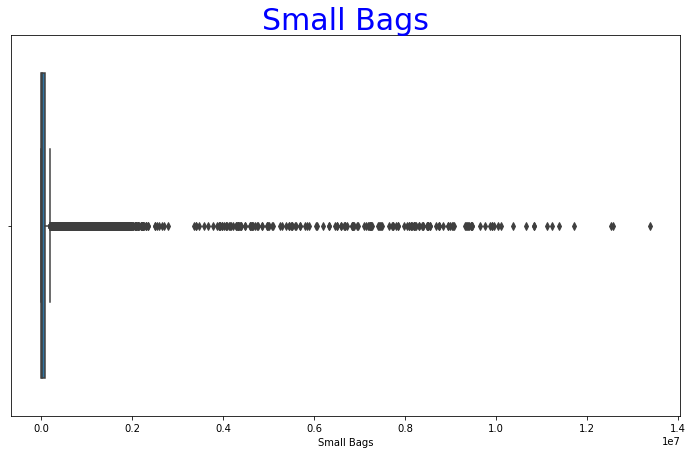

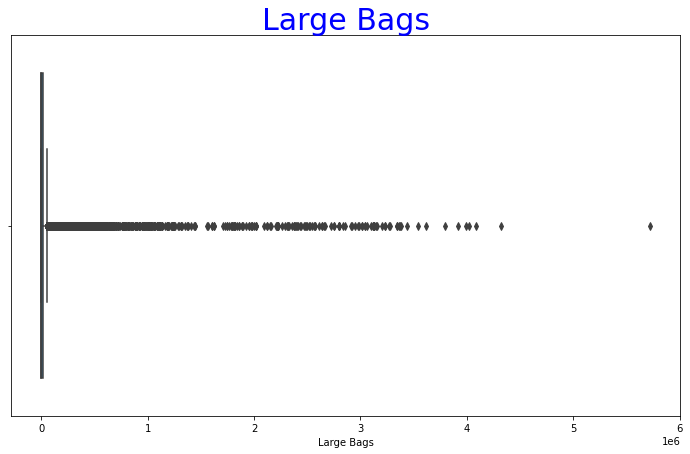

In [50]:
m=range(0,8)
for i in m:
        plt.figure(figsize=(12,7))
        plt.title(df.columns[i],fontsize=30,color='Blue')
        sns.boxplot(df[df.columns[i]])

we can see from the box plot of all columns that there is many outliers present in each column.we should remove this outlier.

# Remove The Outliers By zscore

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  Month         18249 non-null  object 
 13  Day           18249 non-null  object 
dtypes: float64(12), object(2)
memory usage: 1.9+ MB


we see that month and day columns are object type.we should convert into float or int type

In [52]:
df['Month']=df["Month"].astype(float)
df['Day']=df["Day"].astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  float64
 10  year          18249 non-null  float64
 11  region        18249 non-null  float64
 12  Month         18249 non-null  float64
 13  Day           18249 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.18868864, 0.10724593, 0.23081597, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13901962, 0.1759102 , 0.23110251, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18206895, 0.15871589, 0.23100731, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.77885527, 0.2306933 , ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30138182, 0.70775063, 0.2304279 , ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53151208, 0.67449455, 0.22934712, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [55]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0,12.0,27.0
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0,12.0,20.0
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0,12.0,13.0
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0,12.0,6.0
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,3.0,53.0,2.0,4.0
18245,1.71,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,3.0,53.0,1.0,28.0
18246,1.87,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,3.0,53.0,1.0,21.0
18247,1.93,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,3.0,53.0,1.0,14.0


In [57]:
print(df.shape)
print(df_new.shape)

(18249, 14)
(17651, 14)


# checking percentage of dataloss

In [58]:
percentage_of_dataloss=((18249-17651)/18249)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 3.276891884486821


# Dividing data in features and vectors (Target="AveragePrice")

In [59]:
x=df_new.drop("AveragePrice",axis=1) #Independent variable
y=df_new.iloc[:,0] #Dependent variable

In [60]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0,12.0,27.0
1,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0,12.0,20.0
2,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0,12.0,13.0
3,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0,12.0,6.0
4,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,3.0,53.0,2.0,4.0
18245,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,3.0,53.0,1.0,28.0
18246,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,3.0,53.0,1.0,21.0
18247,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,3.0,53.0,1.0,14.0


In [61]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [62]:
print(x.shape)
print(y.shape)

(17651, 13)
(17651,)


# Find multicolinearity by VIF score

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [64]:
#checking VIF score
vif_clac()

      VIF Factor      features
0   1.228788e+01  Total Volume
1   2.574339e+00          4046
2   3.766566e+00          4225
3   2.189153e+00          4770
4   2.333471e+13    Total Bags
5   1.521486e+13    Small Bags
6   1.478286e+12    Large Bags
7   7.093327e+09   XLarge Bags
8   2.217897e+00          type
9   2.849241e+00          year
10  4.158504e+00        region
11  4.065680e+00         Month
12  4.093771e+00           Day


In [65]:
x.skew()

Total Volume   -0.050092
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

# Transforming data to remove skewness

In [66]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.05881199, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.13115244, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.22108844, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.76783522, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.69261004, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.65744025, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

In [67]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0    -0.059539
1    -0.039282
2    -0.044675
3     0.024168
4    -0.022204
5    -0.024405
6    -0.110913
7     0.853758
8    -0.037741
9    -0.087611
10   -0.257799
11   -0.146554
12   -0.208926
dtype: float64

we see that there is no skewness present in any column

# The data is preprocessed and the data is ready fo training process

In [68]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [71]:
lm=LinearRegression()
m=0
for i in range (0,5000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.5745543913419233 at random state= 2154


we find the best random state state at 10.we will creat our train_test_split using this random state

In [72]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=2154)

In [73]:
train_x

array([[ 1.19417757,  1.47034568,  1.05816392, ..., -0.93328784,
         1.05319424,  0.33016884],
       [-1.8820087 , -1.26279283, -1.13910763, ..., -0.70861101,
         1.05319424,  0.84038747],
       [-0.9043444 , -0.39508012, -0.42595998, ...,  0.95078894,
         0.58043445, -1.71010914],
       ...,
       [-1.02396908, -1.64625169, -0.65015013, ..., -0.49640552,
         0.06153255, -1.23624588],
       [-1.05315474, -0.73676085, -0.62435184, ...,  0.38776455,
         0.06153255,  1.03603012],
       [ 0.19468451,  0.33565079,  0.14390753, ...,  1.27010784,
        -1.64028838, -0.57444785]])

In [74]:
test_x

array([[ 0.76235258,  1.01772739,  0.53782263, ...,  1.11195757,
         0.32773043,  0.11597293],
       [-1.19783048, -1.05454177, -0.85168397, ...,  1.32219637,
         0.58043445, -0.21895878],
       [ 0.92272084,  1.02024491,  0.79719049, ...,  1.42548003,
        -1.64028838,  0.7408908 ],
       ...,
       [-0.66938086, -0.10265709, -0.63699439, ..., -1.74916073,
        -0.22098778,  0.93874802],
       [-0.8480964 , -1.51516387, -0.59445732, ..., -1.26000173,
         1.05319424,  0.7408908 ],
       [-0.52125871,  0.13750371, -0.33261368, ...,  1.00486356,
         0.06153255,  0.64019459]])

In [75]:
train_y

582      0.83
12670    2.17
11279    1.86
11624    1.80
16770    1.59
         ... 
14729    1.47
4137     1.14
12846    2.27
16411    2.18
5302     0.88
Name: AveragePrice, Length: 12355, dtype: float64

In [76]:
test_y

7972     1.28
17305    2.28
8315     1.00
6876     1.29
3560     1.60
         ... 
16382    1.86
13940    1.03
9261     1.69
15122    2.08
11337    1.95
Name: AveragePrice, Length: 5296, dtype: float64

In [77]:
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (12355, 13)
test_x shape = (5296, 13)
train_y shape = (12355,)
test_y shape = (5296,)


In [78]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.5745543913419233

In [79]:
lm.coef_

array([-0.27476679,  0.01365963,  0.25860749,  0.03001043, -0.27757958,
        0.21914883, -0.03698427,  0.00221603,  0.18462698,  0.09657381,
        0.01299662,  0.0759809 ,  0.00861015])

In [80]:
lm.intercept_

1.4059058392205404

# Error of Llinear regression Model on our dataset

In [81]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  0.2074140274177635
Mean Squared Error:  0.0681738154182364
Root Mean Squared Error:  0.2611011593582771


In [82]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.5386839028195598


In [83]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.2169096275439018


# Using DecisionTreeRegressor

In [84]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train_x,train_y)

DecisionTreeRegressor()

In [85]:
regressor.score(train_x,train_y)

1.0

In [86]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(regressor,x,y,cv=5)
print("cross validation score of DecisionTreeRegressor is =",scr.mean())

cross validation score of DecisionTreeRegressor is = -0.2621720748485089


# Using RandomForestRegressor¶

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train_x,train_y)
rf_pred=rf.predict(test_x)
rf.score(train_x,train_y)

0.9835987460143618

In [88]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestRegressor is =",scr.mean())

cross validation score of RandomForestRegressor is = 0.19684180220762273


# Using Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.5229379378962586

In [90]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ls,x,y,cv=7)
print("cross validation score of  Lasso Regression is =",scr.mean())

cross validation score of  Lasso Regression is = 0.07170608070698681


# Using Ridge regression

In [91]:
from sklearn.linear_model import Ridge
rd=Lasso(alpha=0.01)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.5229379378962586

In [92]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rd,x,y,cv=4)
print("cross validation score of  Ridge Regression is =",scr.mean())

cross validation score of  Ridge Regression is = 0.016903014595466337


# Using XGBRegressor 

In [93]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(train_x,train_y)
xgb.score(train_x,train_y)

0.9648989864033597

In [94]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x,y,cv=4)
print("cross validation score of XGBRegressor is =",scr.mean())

cross validation score of XGBRegressor is = 0.3502139867701549


# using bagging,boosting,knn

In [95]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [96]:
baging=BaggingRegressor()
adaboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
gradr=GradientBoostingRegressor()
model=[baging,adaboost,knn,gradr]

In [97]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    scr=cross_val_score(i,x,y,cv=4)
    print("cross validation score of",i,"is =",scr.mean())
    print("\n")

accuracy score of BaggingRegressor() is = 0.9742227480306368
cross validation score of BaggingRegressor() is = 0.08720097344031522


accuracy score of AdaBoostRegressor() is = 0.5810248547376917
cross validation score of AdaBoostRegressor() is = -0.05901807462902073


accuracy score of KNeighborsRegressor() is = 0.8675912050680522
cross validation score of KNeighborsRegressor() is = -0.1996114932535004


accuracy score of GradientBoostingRegressor() is = 0.7655152268431317
cross validation score of GradientBoostingRegressor() is = 0.3097357624143716




we get best accuracy score from RandomforestRegressor but cross val score is very low.After much effort, the cross val score did not increase           

# Best parameter Tuning for RandomForest Regressor

In [98]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [99]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=4)

In [134]:
gcvpred1=gcv1.best_estimator_.predict(test_x)
gcv1.best_estimator_.score(train_x,train_y)

0.5877955370598043

In [135]:
final_model=RandomForestRegressor(max_depth=4)

In [136]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 0.5806493383800957


In [137]:
final_model.fit(train_x,train_y)
pred=final_model.predict(test_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.5870309878006432


,Original,Predicted
7972,1.28,1.392967
17305,2.28,1.715862
8315,1.00,1.146795
6876,1.29,1.232517
3560,1.60,1.199872
...,...,...
16382,1.86,1.655985
13940,1.03,1.434057
9261,1.69,1.826951
15122,2.08,1.840148


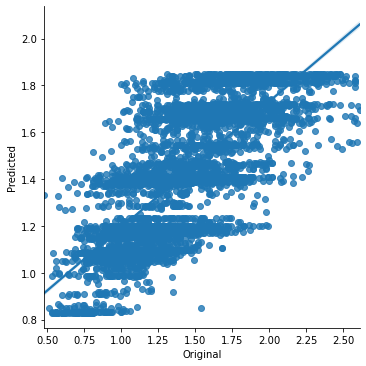

In [138]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Original","Predicted"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

In [ ]:
#Saving the model
import joblib
joblib.dump(final_model,'Avacado project(Target=AveragePrice) Model.pkl')

# Dividing data in features and vectors (Target="Region")

In [107]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,0.0,12.0,27.0
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,0.0,12.0,20.0
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,0.0,12.0,13.0
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,0.0,12.0,6.0
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,0.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,3.0,53.0,2.0,4.0
18245,1.71,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,3.0,53.0,1.0,28.0
18246,1.87,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,3.0,53.0,1.0,21.0
18247,1.93,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,3.0,53.0,1.0,14.0


In [108]:
x=df_new.drop('region',axis=1) #Independent variable
y=df_new.iloc[:,-1] #Dependent variable

In [109]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,12.0,27.0
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,12.0,20.0
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,12.0,13.0
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,12.0,6.0
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,3.0,2.0,4.0
18245,1.71,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,3.0,1.0,28.0
18246,1.87,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,3.0,1.0,21.0
18247,1.93,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,3.0,1.0,14.0


In [110]:
y

0        27.0
1        20.0
2        13.0
3         6.0
4        29.0
         ... 
18244     4.0
18245    28.0
18246    21.0
18247    14.0
18248     7.0
Name: Day, Length: 17651, dtype: float64

# Find multicolinearity by VIF score

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [112]:
#checking VIF score
vif_clac()

      VIF Factor      features
0   2.170670e+01  AveragePrice
1   1.657504e+01  Total Volume
2   2.588398e+00          4046
3   3.782224e+00          4225
4   2.144970e+00          4770
5   2.333471e+13    Total Bags
6   1.521486e+13    Small Bags
7   1.478529e+12    Large Bags
8   7.093623e+09   XLarge Bags
9   4.543138e+00          type
10  2.922737e+00          year
11  4.414575e+00         Month
12  4.132488e+00           Day


we see that VIF score of all column is normal .So, we don't have to drop any columns.

Transforming data to remove skewness

In [113]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.11782446, -0.05881199, -0.65742071, ..., -1.29895853,
         1.49138301,  1.22756521],
       [-0.06432986, -0.13115244, -0.77717852, ..., -1.29895853,
         1.49138301,  0.53822879],
       [-1.29886469,  0.22108844, -0.7317763 , ..., -1.29895853,
         1.49138301, -0.21895878],
       ...,
       [ 1.18432357, -0.76783522, -0.61796649, ...,  1.70123665,
        -1.64028838,  0.64019459],
       [ 1.31329624, -0.69261004, -0.54701087, ...,  1.70123665,
        -1.64028838, -0.10529902],
       [ 0.61561867, -0.65744025, -0.35967077, ...,  1.70123665,
        -1.64028838, -0.9581001 ]])

In [114]:
#print skewness after power transform
df_new2=pd.DataFrame(x)
df_new2.skew()

0     0.000464
1    -0.059539
2    -0.039282
3    -0.044675
4     0.024168
5    -0.022204
6    -0.024405
7    -0.110913
8     0.853758
9    -0.037741
10   -0.087611
11   -0.146554
12   -0.208926
dtype: float64

In [115]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [116]:
x,y=smt.fit_resample(x,y)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

we found best random state values is 791 from the above code.Since the above code takes a lot of time to run completely, there is no need to run second time, so I markdown it.we will creat our train_test_split using this random state

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =791)

In [120]:
x_train

array([[ 0.94692125, -1.26037642, -1.22962127, ...,  0.93303143,
         0.32773043, -0.69868693],
       [ 1.00801933, -1.34515601, -0.99728817, ..., -0.0082797 ,
        -0.85314092, -1.09442556],
       [ 0.91345273, -0.26445451, -0.19908163, ..., -0.0082797 ,
        -0.22098778,  1.41536397],
       ...,
       [-0.92017005,  1.52316705,  1.37295872, ..., -1.29895853,
         1.49138301,  0.53822879],
       [-0.8592574 ,  1.45005084,  1.59294353, ..., -0.0082797 ,
        -0.85314092,  1.22756521],
       [-0.68005433,  0.41089899,  0.21443377, ..., -1.29895853,
        -0.22098778, -1.54176945]])

In [121]:
y_train

19016     9.0
18303     6.0
21880    29.0
11788    24.0
14411    18.0
         ... 
12153    17.0
434       9.0
1276     20.0
4543     27.0
997       3.0
Name: Day, Length: 15884, dtype: float64

In [122]:
x_test

array([[-0.42067135,  0.3746022 ,  0.69288793, ...,  0.93303143,
         1.05319424,  1.41536397],
       [-0.28116111, -0.09198978,  0.50806205, ..., -1.29895853,
         0.32773043, -0.33487985],
       [-0.13906709, -0.06876182,  0.10884876, ..., -0.0082797 ,
        -0.85314092,  0.53822879],
       ...,
       [-0.82902557,  1.0028913 , -0.10658473, ..., -0.0082797 ,
        -1.21890654,  1.32191077],
       [-0.03775626, -0.47814521, -0.13216863, ..., -1.29895853,
         0.82172671,  0.53822879],
       [-0.39032579,  0.96908028,  0.37298923, ..., -0.0082797 ,
         0.58043445, -0.10529902]])

In [123]:
y_test

5881     29.0
11011    12.0
20608    20.0
16482    26.0
5858      2.0
         ... 
15167    17.0
9198     16.0
2971     28.0
9297     20.0
19749    14.0
Name: Day, Length: 6808, dtype: float64

In [124]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (15884, 13)
x_test shape = (6808, 13)
y_train shape = (15884,)
y_test shape = (6808,)


In [125]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [126]:
model=[lg,gnb,svc,dtc,knn,rfc]

In [127]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is
0.5406874265569918
[[200  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 10 191  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  56 147   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  38 125  22  32   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  52 132  45   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3  27 173  16   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  46 134  42   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  48  57  86  

In [128]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print("cross validation score of",m,"is =",scr.mean())

cross validation score of LogisticRegression() is = 0.4247324325266427
cross validation score of GaussianNB() is = 1.0
cross validation score of SVC() is = 0.5305000072337183
cross validation score of DecisionTreeClassifier() is = 1.0
cross validation score of KNeighborsClassifier() is = 0.3835332898145071
cross validation score of RandomForestClassifier() is = 0.9317821328322357


we get best accuracy score and cross validation score 1.0 from GaussianNB() and DecisionTreeClassifier().This means that our estimated data is 100% accurate. Then we don't have to work on best parameter tuning.


In [129]:
final_model=DecisionTreeClassifier()

In [130]:
final_model.fit(x_test,y_test)
pred=final_model.predict(x_test)
print("Test Accuracy=",final_model.score(x_test,y_test))

Test Accuracy= 1.0


In [131]:
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_train)
print("Train Accuracy=",final_model.score(x_train,y_train))

Train Accuracy= 1.0


<bound method NDFrame.head of        Predicted  Original
5881        29.0      29.0
11011       12.0      12.0
20608       20.0      20.0
16482       26.0      26.0
5858         2.0       2.0
...          ...       ...
15167       17.0      17.0
9198        16.0      16.0
2971        28.0      28.0
9297        20.0      20.0
19749       14.0      14.0

[6808 rows x 2 columns]>

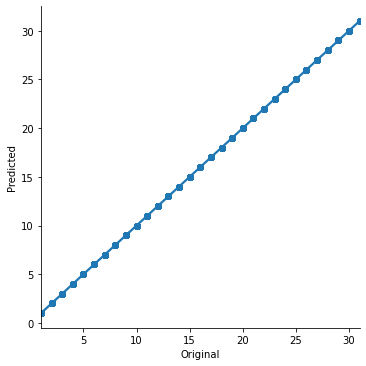

In [132]:
MLdf= pd.DataFrame({'Original':y_test,'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf.head

In [ ]:
#Saving the model
import joblib
joblib.dump(final_model,'Avacado project(Target=region) Model.pkl')

We can see that our model did not do very well for the average price target variable.                                  
But we have been able to create a model that will provide 100% accurate data for region variables.

# Thank You